In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
size_of_sample = 2000
max_l = 100
l = 0
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])

In [3]:
L_dist = [[] for j in range(8)]

In [4]:
def dist_update(l, L_i_j, L_j_i, L_j):
    tmp = L_j[0]
    for j in range(len(L_j_i[0])):
            if (H[0][j]):
                tmp += L_i_j[0][j]
    if (float('-inf') < tmp < float('inf')):
        if (l == 1):
            L_dist[0].append(tmp)    
        elif (l == 2):
            L_dist[1].append(tmp)
        elif (l == 5):
            L_dist[2].append(tmp)
        elif (l == 10):
            L_dist[3].append(tmp)
        elif (l == 20):
            L_dist[4].append(tmp)
        elif (l == 40):
            L_dist[5].append(tmp)
        elif (l == 80):
            L_dist[6].append(tmp)
        elif (l == 100):
            L_dist[7].append(tmp)

In [5]:
def dc_update(L_j_i):
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    for i in range(len(L_i_j)):
        for j in range(len(L_i_j[0])):
            tmp = 1
            for k in range(len(L_i_j[0])):
                if (k != j ):
                    if (H[i][k]):
                        tmp *= np.tanh(L_j_i[k][i] / 2)
            L_i_j[i][j] = 2 * np.arctanh(tmp)
    return L_i_j

In [6]:
def dv_update(L_i_j, L_j_i, L_j):
    for i in range(len(L_j_i)):
        for j in range(len(L_j_i[0])):
            tmp = L_j[i]
            for k in range(len(L_j_i[0])):
                if (k != j):
                    if (H[k][i]):
                        tmp += L_i_j[k][i]
            L_j_i[i][j] = tmp
    return L_j_i

In [7]:
def stop_kriteria(L_j_i, L_i_j, L_j, H, l):
    mv = np.zeros(12)
    for j in range(len(L_j_i)):
        tmp = 0
        for i in range(len(L_j_i[0])):
            if (H[i][j]):
                tmp += L_i_j[i][j]
        if (tmp + L_j[j] < 0):
            mv[j] = 1
        else:
            mv[j] = 0
    if (np.dot(mv, H.T).all() == 0):
        #print("got_it\n")
        #print(mv)
        #print(l)
        return True
    elif (l == max_l):
        #print("max_iter_reach")
        return False
    return 4

In [8]:
def iteration_of_sample(sigma):
    nu = np.random.normal(0, sigma, 12)
    l = 0
    v = [1 for i in range(12)]
    y = [v[i] + nu[i] for i in range(12)]
    L_j = [2 * i / (sigma ** 2) for i in y]
    L_j_i = [[L_j[j] if H[i][j] == 1 else 0 for i in range(6)] for j in range(12)]
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    while True:
        L_i_j = dc_update(L_j_i)
        L_j_i = dv_update(L_i_j, L_j_i, L_j)
        l += 1
        dist_update(l, L_i_j, L_j_i, L_j)
        if (stop_kriteria(L_j_i, L_i_j, L_j, H, l) != 4):
            break
    return l

Рассмотрим распределение на v и u для сигмы, находящейся в районе трешхолда, на 1, 2, 5, 10, 20, 40, 80 итерациях, пока только для первой вершины

In [9]:
sigma = 0.4
i = 0
while (i < size_of_sample):
    iteration_of_sample(sigma)
    i += 1

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


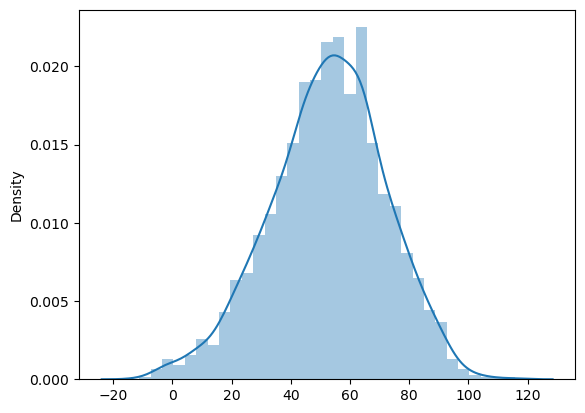

In [10]:
sns_plot = sns.distplot(L_dist[0])
fig = sns_plot.get_figure()

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


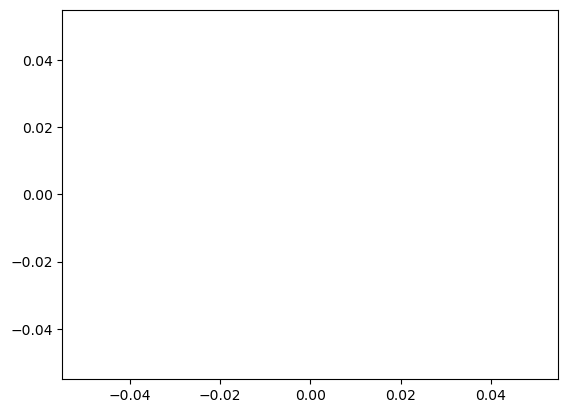

In [11]:
sns_plot = sns.distplot(L_dist[1])
fig = sns_plot.get_figure()

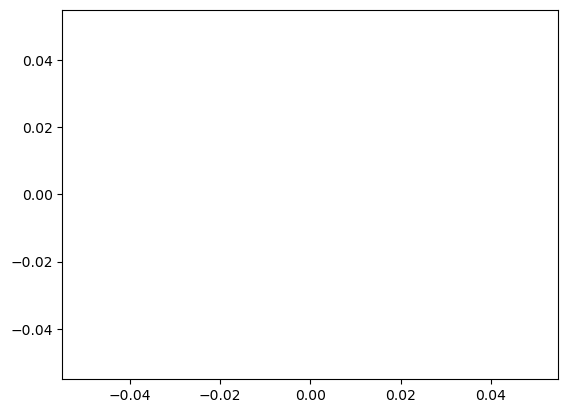

In [12]:
sns_plot = sns.distplot(L_dist[2])
fig = sns_plot.get_figure()

In [ ]:
len(L_dist[0])